In [1]:
import numpy as np
import matplotlib.pyplot as plt

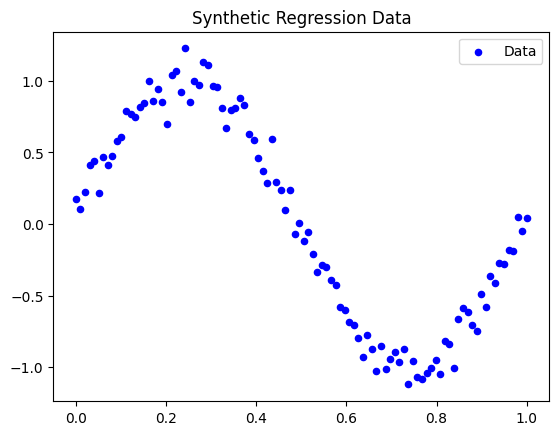

In [2]:
# Generate synthetic regression data
np.random.seed(0)
X = np.linspace(0, 1, 100).reshape(-1, 1)
y = np.sin(2 * np.pi * X).ravel() + 0.1 * np.random.randn(100)

plt.scatter(X, y, c="blue", s=20, label="Data")
plt.title("Synthetic Regression Data")
plt.legend()
plt.show()

In [3]:
# Define a Node in the regression tree
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature      # feature index to split
        self.threshold = threshold  # split threshold
        self.left = left            # left child (Node)
        self.right = right          # right child (Node)
        self.value = value          # prediction value if leaf

In [4]:
# Function to compute mean squared error for a split
def mse(y):
    if len(y) == 0:
        return 0
    return np.var(y) * len(y)

In [5]:
# Function to find the best split
def best_split(X, y):
    m, n = X.shape
    if m <= 1:
        return None, None

    # Current MSE
    best_feature, best_thresh = None, None
    best_mse = float("inf")

    for feature in range(n):
        thresholds = np.unique(X[:, feature])
        for t in thresholds:
            left_idx = X[:, feature] <= t
            right_idx = X[:, feature] > t
            if sum(left_idx) == 0 or sum(right_idx) == 0:
                continue
            mse_split = mse(y[left_idx]) + mse(y[right_idx])
            if mse_split < best_mse:
                best_mse = mse_split
                best_feature, best_thresh = feature, t
    return best_feature, best_thresh


In [6]:
# Recursive function to build tree
def build_tree(X, y, depth=0, max_depth=3, min_samples_split=2):
    # stopping conditions (pre-pruning)
    if depth >= max_depth or len(y) < min_samples_split:
        return Node(value=np.mean(y))

    feature, thresh = best_split(X, y)
    if feature is None:
        return Node(value=np.mean(y))

    left_idx = X[:, feature] <= thresh
    right_idx = X[:, feature] > thresh

    left_child = build_tree(X[left_idx], y[left_idx], depth+1, max_depth, min_samples_split)
    right_child = build_tree(X[right_idx], y[right_idx], depth+1, max_depth, min_samples_split)

    return Node(feature=feature, threshold=thresh, left=left_child, right=right_child)


In [7]:
# Prediction function
def predict_one(x, tree):
    if tree.value is not None:
        return tree.value
    if x[tree.feature] <= tree.threshold:
        return predict_one(x, tree.left)
    else:
        return predict_one(x, tree.right)

def predict(X, tree):
    return np.array([predict_one(sample, tree) for sample in X])


In [8]:
# Train and test trees with different pruning settings
tree_no_pruning = build_tree(X, y, max_depth=10, min_samples_split=2)
tree_pruned = build_tree(X, y, max_depth=3, min_samples_split=5)

y_pred_no_pruning = predict(X, tree_no_pruning)
y_pred_pruned = predict(X, tree_pruned)

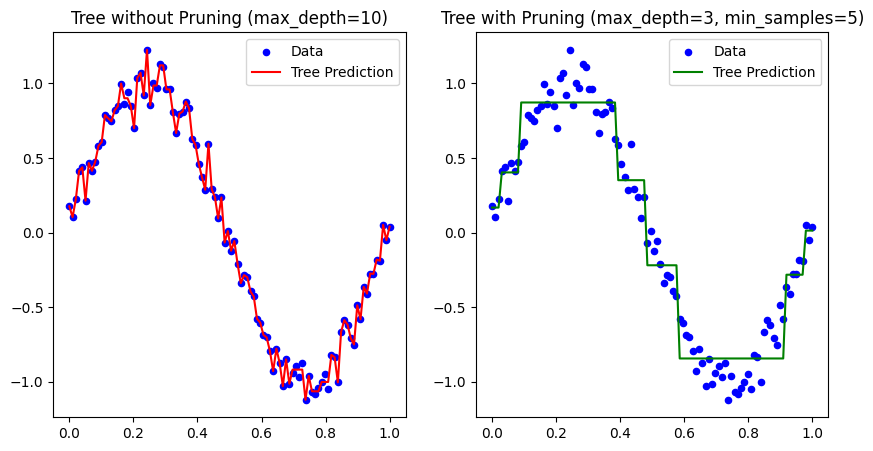

In [9]:
# Plot results
plt.figure(figsize=(10,5))

# No pruning
plt.subplot(1,2,1)
plt.scatter(X, y, c="blue", s=20, label="Data")
plt.plot(X, y_pred_no_pruning, c="red", label="Tree Prediction")
plt.title("Tree without Pruning (max_depth=10)")
plt.legend()

# With pruning
plt.subplot(1,2,2)
plt.scatter(X, y, c="blue", s=20, label="Data")
plt.plot(X, y_pred_pruned, c="green", label="Tree Prediction")
plt.title("Tree with Pruning (max_depth=3, min_samples=5)")
plt.legend()

plt.show()
